In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

# Set the column names based on the .names file
col_names = ["name", "MDVP_Fo", "MDVP_Fhi", "MDVP_Flo", "MDVP_Jitter_perc", "MDVP_Jitter_abs", "MDVP_RAP",
             "MDVP_PPQ", "Jitter_DDP", "MDVP_Shimmer", "MDVP_Shimmer_dB", "Shimmer_APQ3", "Shimmer_APQ5",
             "MDVP_APQ", "Shimmer_DDA", "NHR", "HNR", "RPDE", "DFA", "spread1", "spread2", "D2", "PPE", "status"]

df.columns = col_names

In [18]:
# Check for missing values
print("Missing Values: ", df.isnull().sum().sum())

Missing Values:  0


In [19]:
# Check the data types
print("Data Types: \n", df.dtypes)

Data Types: 
 name                 object
MDVP_Fo             float64
MDVP_Fhi            float64
MDVP_Flo            float64
MDVP_Jitter_perc    float64
MDVP_Jitter_abs     float64
MDVP_RAP            float64
MDVP_PPQ            float64
Jitter_DDP          float64
MDVP_Shimmer        float64
MDVP_Shimmer_dB     float64
Shimmer_APQ3        float64
Shimmer_APQ5        float64
MDVP_APQ            float64
Shimmer_DDA         float64
NHR                 float64
HNR                 float64
RPDE                  int64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
status              float64
dtype: object


In [20]:
# Check the distribution of the target variable
print("Target Variable Distribution:\n", df["status"].value_counts())

Target Variable Distribution:
 0.284654    1
0.457533    1
0.181988    1
0.222716    1
0.214075    1
           ..
0.226247    1
0.185580    1
0.141958    1
0.180828    1
0.148569    1
Name: status, Length: 195, dtype: int64


In [21]:
df.head()

,name,MDVP_Fo,MDVP_Fhi,MDVP_Flo,MDVP_Jitter_perc,MDVP_Jitter_abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


<ipython-input-22-cd6d5bad35f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


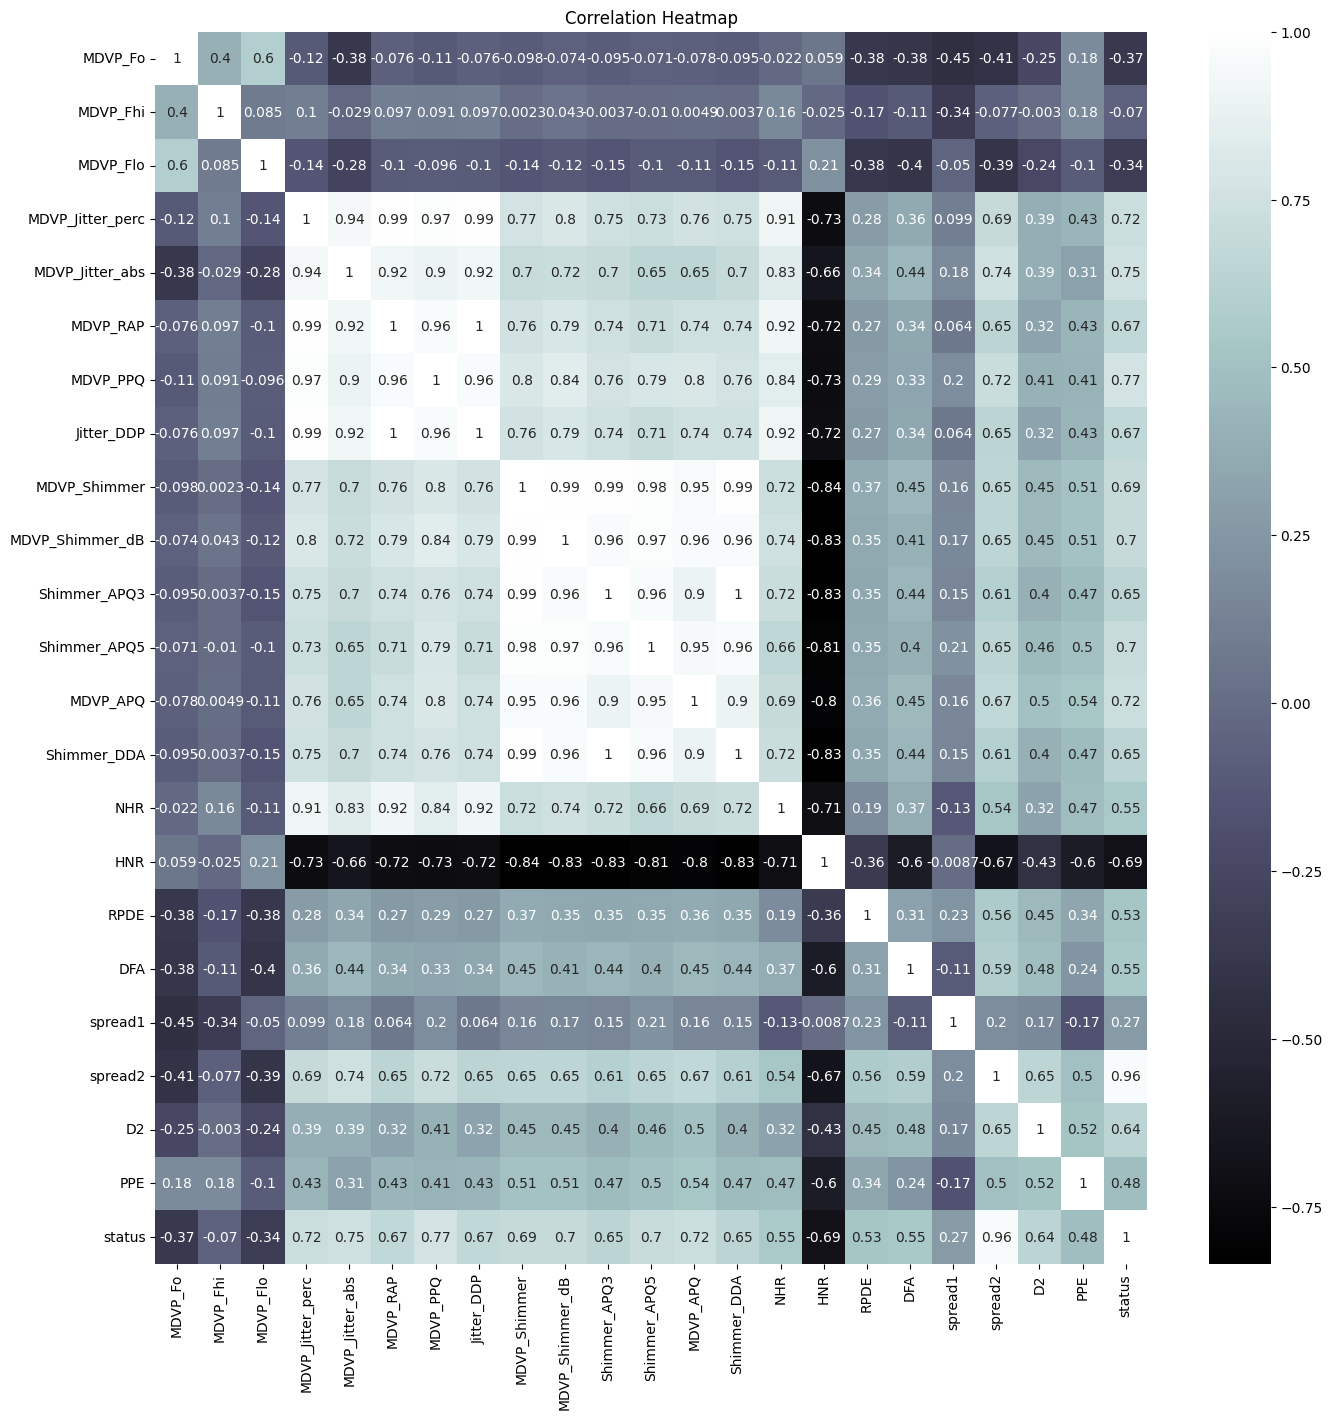

In [22]:
# Check the correlation between the features
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, cmap="bone", annot=True)
plt.title("Correlation Heatmap")
plt.show()

Based on the heatmap, some of the features that appear to be strongly correlated with the target variable (status) are:

MDVP_Fo (fundamental frequency)

MDVP_Shimmer (measures of variation in amplitude)

MDVP_APQ (measures of variation in frequency)

NHR (noise to harmonic ratio)

HNR (harmonic to noise ratio)

RPDE (recurrence period density entropy)

PPE (pitch period entropy)

In [23]:
df.columns

Index(['name', 'MDVP_Fo', 'MDVP_Fhi', 'MDVP_Flo', 'MDVP_Jitter_perc',
       'MDVP_Jitter_abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2',
       'PPE', 'status'],
      dtype='object')

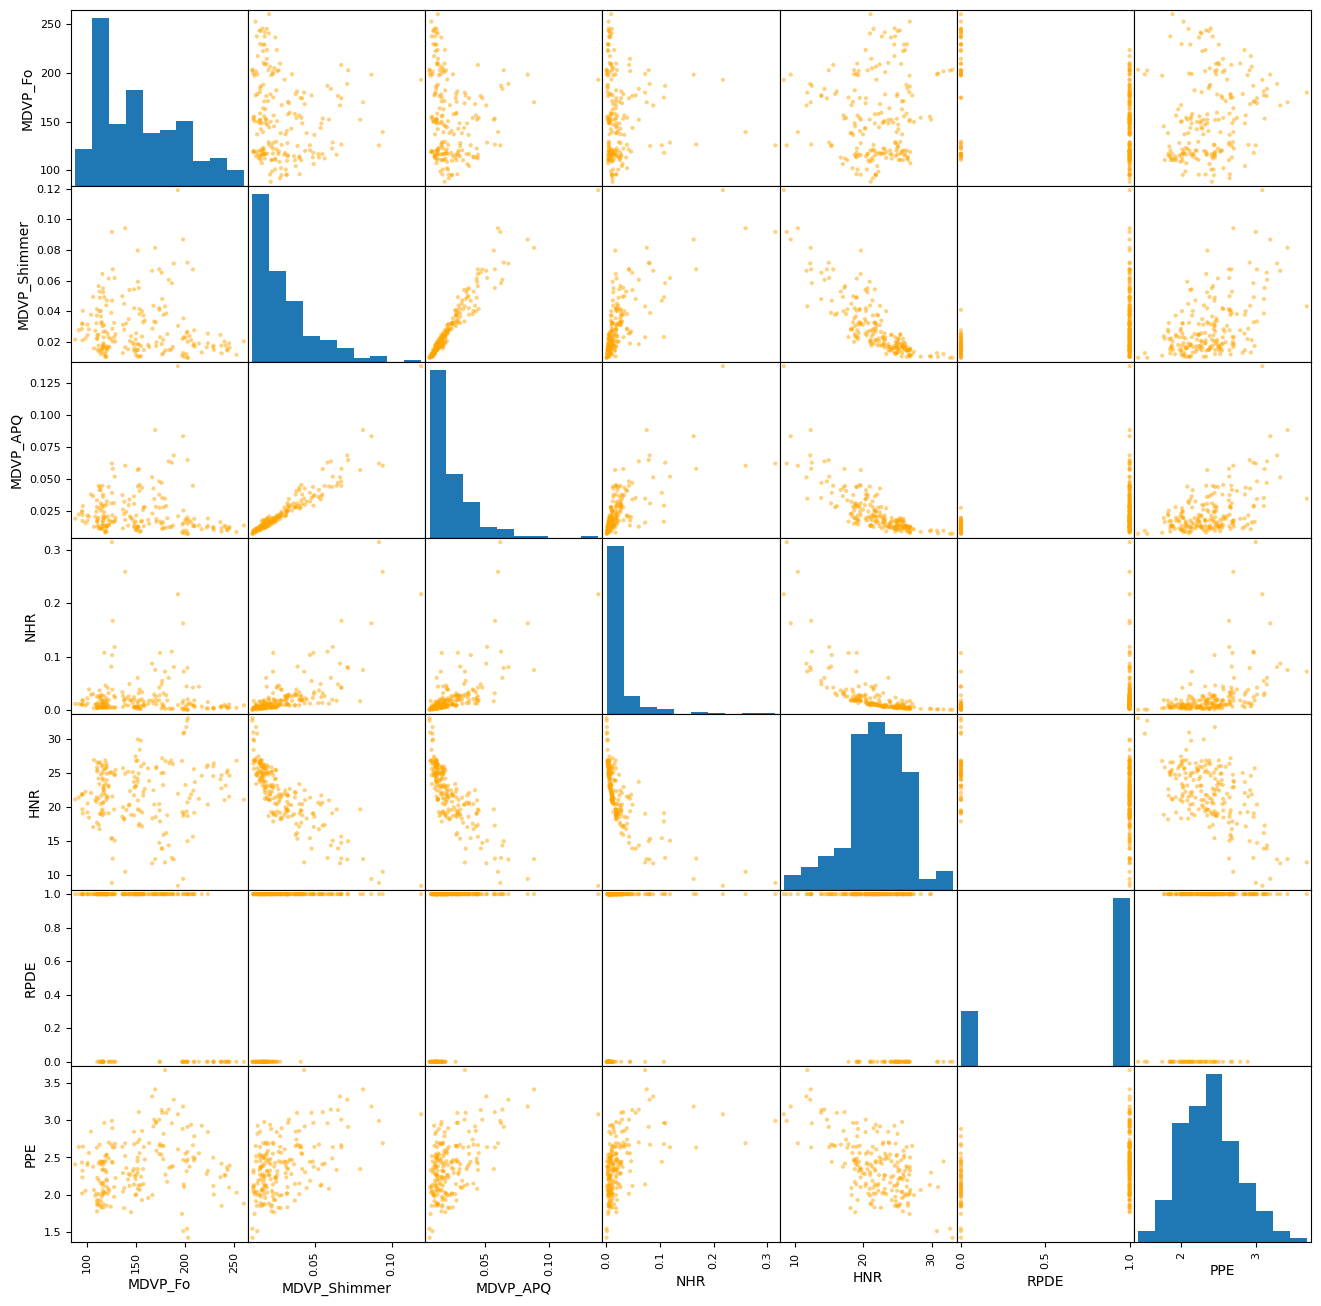

In [27]:
important_cols = ["MDVP_Fo", "MDVP_Shimmer", "MDVP_APQ", "NHR", "HNR", "RPDE", "PPE"]

# Create a scatter plot matrix of the important features
pd.plotting.scatter_matrix(df[important_cols], figsize=(16, 16), color='orange')
plt.show()